In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d pranavraikokte/covid19-image-dataset
! unzip covid19-image-dataset.zip


covid19-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  covid19-image-dataset.zip
replace Covid19-dataset/test/Covid/0100.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Covid19-dataset/test/Covid/0102.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Covid19-dataset/test/Covid/0102.jpeg  
  inflating: Covid19-dataset/test/Covid/0105.png  
  inflating: Covid19-dataset/test/Covid/0106.jpeg  
  inflating: Covid19-dataset/test/Covid/0108.jpeg  
  inflating: Covid19-dataset/test/Covid/0111.jpg  
  inflating: Covid19-dataset/test/Covid/0112.jpg  
  inflating: Covid19-dataset/test/Covid/0113.jpg  
  inflating: Covid19-dataset/test/Covid/0115.jpeg  
  inflating: Covid19-dataset/test/Covid/0118.jpeg  
  inflating: Covid19-dataset/test/Covid/0119.jpeg  
  inflating: Covid19-dataset/test/Covid/0120.jpg  
  inflating: Covid19-dataset/test/Covid/094.png  
  inflating: Covid19-dataset/test/Covid/096.png  
  inflating: Cov

In [26]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np

import keras 
from keras.models import *
from keras.layers import Dense
from google.colab.patches import cv2_imshow
from keras.callbacks import EarlyStopping

In [27]:
#load train data
covid_train = [cv2.imread(file,cv2.IMREAD_GRAYSCALE) for file in glob.glob('/content/Covid19-dataset/train/Covid/*')]
print(covid_train[0].shape)

normal_train = [cv2.imread(file,cv2.IMREAD_GRAYSCALE) for file in glob.glob('/content/Covid19-dataset/train/Normal/*')]
print(normal_train[0].shape)

(1165, 1165)
(1828, 2251)


In [28]:
#load test data 
covid_test = [cv2.imread(file,cv2.IMREAD_GRAYSCALE) for file in glob.glob('/content/Covid19-dataset/test/Covid/*')]
normal_test= [cv2.imread(file,cv2.IMREAD_GRAYSCALE) for file in glob.glob('/content/Covid19-dataset/test/Normal/*')]


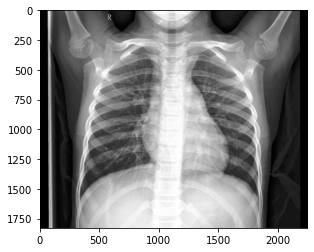

20
(20,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


In [29]:
plt.imshow(normal_train[0],cmap='gray') 
plt.show()  # display it
print(len(normal_test))
print(np.array(normal_test).shape)




In [8]:
print(len(covid_train))
print(len(normal_train))

111
70


In [9]:
#collect train data, create y_
x_train=[]
x_train=covid_train 


for x in normal_train:
  x_train.append(x)

y_train=[]
for i in range(0,111):
  y_train.append(1)

for i in range(111,181):
  y_train.append(0)



print(len(x_train))
print(len(y_train))
x_train_arr=np.array(x_train)
print(x_train_arr[0].shape)
print(x_train_arr.shape)


181
181
(1165, 1165)
(181,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [10]:
print(len(covid_test))
print(len(normal_test))

26
20


In [11]:
x_test=[]
x_test=covid_test


for x in normal_test:
  x_test.append(x)

y_test=[]
for i in range(0,26):
  y_test.append(1)

for i in range(26,46):
  y_test.append(0)



print(len(x_test))
print(len(y_test))
x_test_arr=np.array(x_test)
print(x_test_arr.shape)
#IM HERE

46
46
(46,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [12]:
#resizing
x_train_resized=[]
x_test_resized=[]
for i in range(0,181):
  x_train_resized.append( cv2.resize(x_train_arr[i],(240,240)))

for i in range(0,46):
  x_test_resized.append( cv2.resize(x_test_arr[i],(240,240)))



In [13]:

print(len(x_train_resized))
print(len(x_test_resized))



181
46


In [14]:
#convert lists to np arrays
x_train_resized[0].shape
x_train_final=np.array(x_train_resized)
x_test_final=np.array(x_test_resized)
print(len(x_test_final))


46


In [15]:
#re shapping
x_train_final=x_train_final.reshape(-1,240*240)
x_test_final=x_test_final.reshape(-1,240*240)
x_train_final.shape

y_train=np.array(y_train)
y_test=np.array(y_test)
#print(len(x_test_final))

In [38]:
#modling
model = keras.Sequential()
model.add(keras.layers.Dense(1,input_shape=(240*240,), activation="sigmoid"))
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])


In [41]:
results = model.fit(x_train_final,y_train,shuffle=True,epochs=100,verbose=1,validation_data=(x_test_final,y_test),
                    callbacks=keras.callbacks.EarlyStopping(patience=15,restore_best_weights=True)) 



Epoch 1/100
6/6 [==============================] - 0s 20ms/step - loss: 291786.1250 - accuracy: 0.7127 - val_loss: 34578.9766 - val_accuracy: 0.9130
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 29364.9688 - accuracy: 0.9227 - val_loss: 26695.9219 - val_accuracy: 0.9565
Epoch 3/100
6/6 [==============================] - 0s 18ms/step - loss: 18373.0645 - accuracy: 0.9613 - val_loss: 55671.6641 - val_accuracy: 0.9130
Epoch 4/100
6/6 [==============================] - 0s 14ms/step - loss: 15632.9834 - accuracy: 0.9724 - val_loss: 29866.9043 - val_accuracy: 0.9348
Epoch 5/100
6/6 [==============================] - 0s 15ms/step - loss: 15190.4365 - accuracy: 0.9724 - val_loss: 21303.2344 - val_accuracy: 0.9783
Epoch 6/100
6/6 [==============================] - 0s 15ms/step - loss: 14996.0371 - accuracy: 0.9503 - val_loss: 53616.6094 - val_accuracy: 0.9130
Epoch 7/100
6/6 [==============================] - 0s 17ms/step - loss: 7423.7944 - accuracy: 0.9779 - val_loss

In [42]:
model.evaluate(x_test_final,y_test)

2/2 [==============================] - 0s 9ms/step - loss: 20343.3887 - accuracy: 0.9783


[20343.388671875, 0.97826087474823]

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 57601     
                                                                 
Total params: 57,601
Trainable params: 57,601
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'losses')

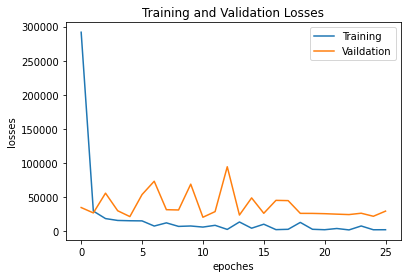

In [43]:
import matplotlib.pyplot as plt
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoches')
plt.ylabel('losses')

Text(0, 0.5, 'accuracy')

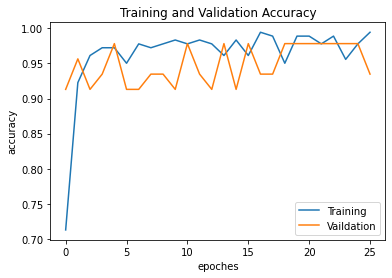

In [44]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')